# Линейные модели

## Линейная регрессия

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регресси на примере листка ириса. Будем предсказывать длину листка по его ширине. x - ширина листа, y - длина листка.

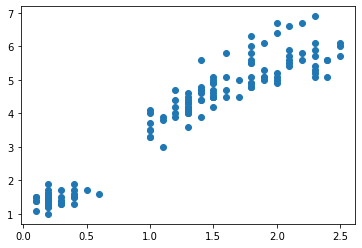

In [30]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = load_iris().data
x = data[:,3]
y = data[:,2]
plt.scatter(x, y)
plt.show()

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости длины листа $y$ от ширины листа $x$ прямой линией $y = w_0 + w_1 * x$:

$$E(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 \cdot x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – длина и ширина листа ириса для $i$-ого объекта в наборе данных.

In [31]:
n = x.shape[0]
w0=0

In [32]:
def square_error(w0, w1):
    sum = 0
    for i in range (x.shape[0]):
      sum += ((y[i]-(w0+w1*x[i]))**2)
    return sum

Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые быдут некоторым образом описывать зависмость ширины листа от его длины. Представьте графически.

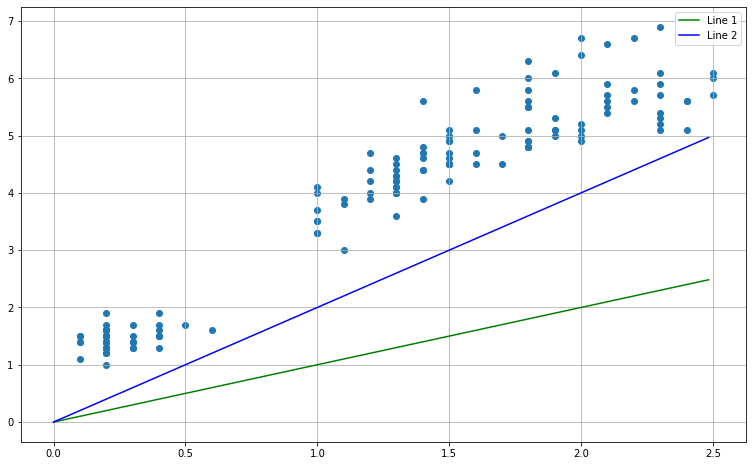

In [33]:
lineFunc = lambda x, w0, w1: w0 + w1 * x
# Code here
plt.figure(figsize=(13,8))
plt.scatter(x, y)
#-----------------------------
x_lin = np.arange(0, 2.5, 0.1/6)
y_1 = lineFunc(x_lin, w0, 1)
y_2 = lineFunc(x_lin, w0, 2)

plt.plot(x_lin, y_1, color="green", label="Line 1")
plt.plot(x_lin, y_2, color="blue", label="Line 2")

plt.grid(True)
plt.legend()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

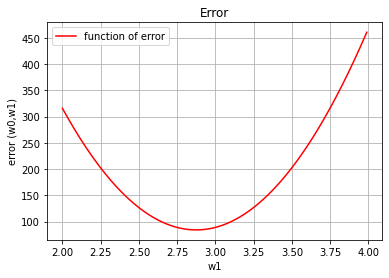

In [34]:
w = np.arange(2, 4, 0.01)

err = [square_error(w0,w1) for w1 in w]
plt.title('Error')
plt.xlabel('w1')
plt.ylabel('error (w0,w1)')

plt.plot(w, err, color="red", label="function of error")
plt.grid(True)
plt.legend()

С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (0, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

In [35]:
from scipy.optimize import minimize_scalar
w0=0
def w1_err(w1):
  return (square_error(w0,w1))
minimum=minimize_scalar(w1_err, bounds=(-10, 10), method='bounded')
w1_opt = minimum.fun
minimum


     fun: 84.27388019713558
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 2.874706446598088

In [36]:
from scipy.optimize import minimize_scalar
#-------------------------------------
def error1(w):
    s=0
    for i in range(x.shape[0]):
     s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

import scipy.optimize as optimize
minimum = optimize.minimize(error1, np.array([0,0]), bounds=((1,3),(-5, 5)))
#-------------------------------------
w1_opt = minimum.fun
w0_opt = minimum.x[0]
minimum

      fun: 33.84475316680388
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.10542736e-07, -1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 21
      nit: 4
   status: 0
  success: True
        x: array([1.08355805, 2.22994048])

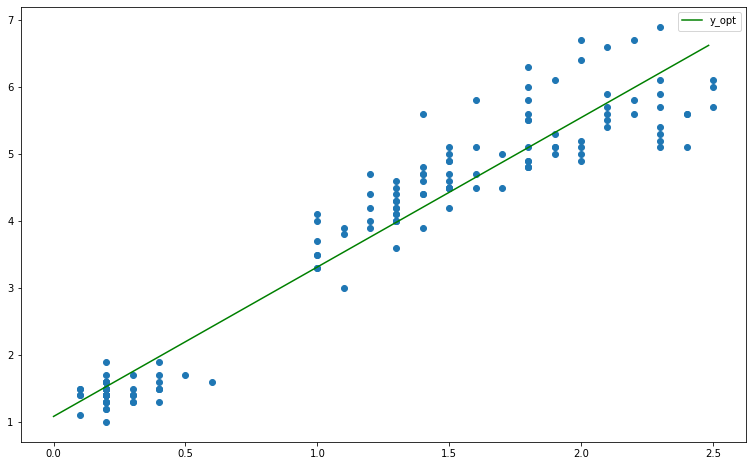

In [37]:
plt.figure(figsize=(13,8))
plt.scatter(x, y)
#-----------------------------
x_lin = np.arange(0, 2.5, 0.1/6)
y_1 = lineFunc(x_lin, minimum.x[0], minimum.x[1])

plt.plot(x_lin, y_1, color="green", label="y_opt")

plt.legend()

## Линейная классификация

Рассмотрим в работе способы построения линейной модели классификации.

Линейный классификатор представляет собой линейную модель, разделяющую два класса (-1, 1). Линейная модель описывается следующей формулой $\langle \omega, x \rangle + b = y$. Вектор весов $\omega$ - вектор нормали этой линейно модели. При $y = 0$, все точки $x$ принадлежат этой разделяющей прямой, при $y > 0$ объеты $x$ лежат с той стороны прямой линии, куда смотрит вектор весов $\omega$, при $y < 0$ с другой стороны прямой линии. Таким образом линейная модель разделяет все объекты на положительный и отрицательные, причем чем дальше объект лежит от прямой, тем большее абсолютное значение он имеет.

Необходимо ввести обозначение отступа:

$$M = y \langle \omega, x \rangle$$

Таким образом, если объект будет лежать со стороны своего класса (классифицироваться правильно), то $M$ всегда будет иметь положительное значение. В случае неправилной классификации отступ будет отрицательным.

Введем несколько loss-функцию, которые будет оптимизировать:

1. логистическая: $$\bar L(M) = \ln(1+ \exp(-M))$$

2. экспоненциальны: $$\bar L(M) = \exp(-M)$$

3. кусочно-линейная: $$\bar L(M) = max(0, 1-M))$$

Таким образом для каждого объекта будет вычислена его собственный штраф. Чтобы получить полную функцию потеря - просто проссумируем штрафы всех объектов.
Таким образом у нас будет функция, подсчитывающая штрафы для конкретной модели. Необходимо ее оптимизировать, для этого надо вычислить градиент и начать движение (изменение весов модели $\omega$) в сторону антиградиента с некоторым постоянным шагом.

## Задача
1. Написать функцию расчета функции потерь (loss-функции) и градиента функции. (выбрать любую функцию)
2. Реализовать градиентный спуск по всем данным.
3. Реализовать стохастический градиентный спуск.

In [38]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

### Задача 1
Напишите две функции, которые будут получать на вход вектор весов, признаки и целевую переменную. Функции должны возвращать суммарную ошибку и градиент.

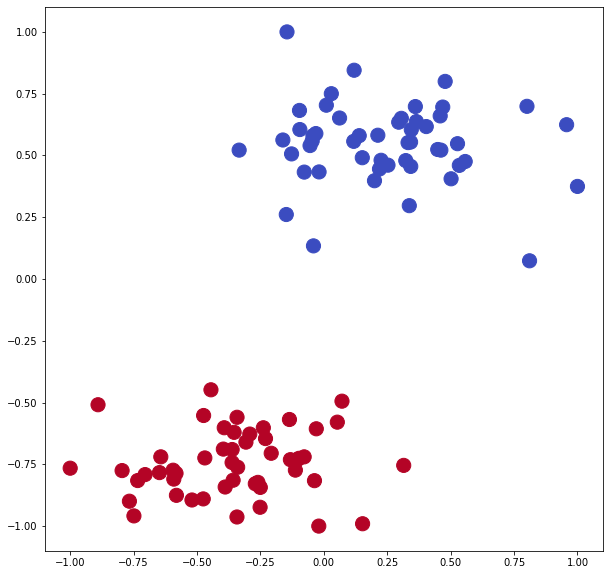

In [39]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2 ,cluster_std=1, random_state=17, center_box=(-10, 10))
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
X[:,0] = 2 * (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min()) - 1
X[:,1] = 2 * (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min()) -1
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)

Y[Y == 0] = -1

In [40]:
w0, w1, w2 = 0.5, 1, 1
def M():
  return (- Y * (w2 * X[:,1] + w1 * X[:,0] + w0))

def loss(M):
  return sum(np.log(1 + np.exp(- Y * (w2 * X[:,1] + w1 * X[:,0] + w0))))

def grad_loss(M):
  div_w0 = sum(- 1 / (1 + np.exp(M)) * Y * np.exp(M))
  div_w1 = sum(- 1 / (1 + np.exp(M)) * Y * X[:,0] * np.exp(M))
  div_w2 = sum(- 1 / (1 + np.exp(M)) * Y * X[:,1] * np.exp(M))

  return div_w0, div_w1, div_w2

In [41]:
print(grad_loss(M()))

(6.8532631433583235, 22.380522469025035, 45.65125969804895)


### Задача 2. Реализация метода градиентного спуска
Постройте анимационную гифку схождения вашей линейной модели к данным. Подпишите loss к каждому кадру на гифке.

In [42]:
def classificate(w0, w1, w2, x):
  y = w0+w1*x[:,0]+ w2*x[:,1]
  return y

In [43]:
w0, w1, w2 = 0.5, 1, 1
sigma = 1e-2

104.51910212288801


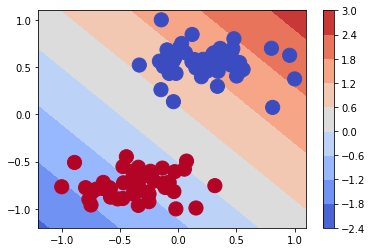

In [44]:
x1, x2 = np.mgrid[min(X[:,0]) - 0.2:max(X[:,0]) + 0.2:0.1,
min(X[:,1]) - 0.2:max(X[:,1]) + 0.2:0.1]

y = classificate(w0, w1, w2, np.concatenate((np.expand_dims(x1.ravel(), axis = 1), x2.reshape((-1,1))), axis = 1))
y = y.reshape(x1.shape)

plt.contourf(x1, x2, y, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)

delta_w0, delta_w1, delta_w2 = grad_loss(M())
w0 -= sigma * delta_w0
w1 -= sigma * delta_w1
w2 -= sigma * delta_w2

print(loss(M))

Дан набор данных.
Проведена нормализация данных по признакам и выставлены классы (-1, 1).

Проведите случайную линейную модель, постройте ее на графике и вычислите для нее суммарную функцию ошибки.
Проверьте, что суммарная функция ошибки считается правильно.

In [45]:
print(delta_w0, delta_w1, delta_w2)

6.8532631433583235 22.380522469025035 45.65125969804895


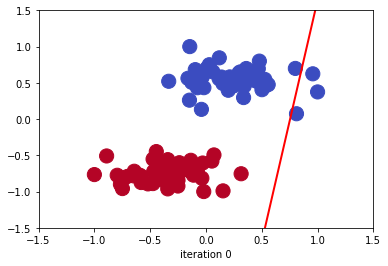

In [46]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

fig, ax = plt.subplots()

k = 10
b = -5
m = 1e-3 # шаг обучения

 # Данные
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)

# Модель данных
line = lambda x1 : -(x1 * k + b)
clf, = ax.plot([X[:,0].min() - .5, X[:,0].max() + .5], [line(X[:,0].min() - .5), line(X[:,0].max() + .5)], 'r-', linewidth=2)

# Настройка графика
ax.set_xlim([X[:,0].min() - .5, X[:,0].max() + .5])
ax.set_ylim([X[:,1].min() - .5, X[:,1].max() + .5])


def update(i):
    global w, X, Y, m, k, b
    label = 'iteration {0}'.format(i)
    
    # Градиент в примере задан постоянными величинами
    # На деле после каждой итерации необходимо пересчитывать градиент и изменять веса модели.
    div_w0 = 10
    div_w1 = 20
    
    k -= m * div_w0
    b -= m * div_w1


    line = lambda c_x : c_x * k + b
    clf.set_ydata([line(X[:,0].min()), line(X[:,0].max())])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 100))
rc('animation', html='html5')

In [47]:
anim

### Задача 3. Реализация стохастического градиентного спуска.
Используйте на каждой итерации не весь набор данных, а $n$ случайных объектов из выборки. Оформите результат схождения вашей модели в виде гифки.

In [48]:
import random

In [49]:
def rnd():
  r1, r2 = random.randint(1,100), random.randint(1,100)
  r1 = min(r1, r2)
  r2 = max(r1, r2)
  if (r1==r2):
    r1 = int(r1/2)   
  return (r1, r2)
  
w0, w1, w2 = 0.5, 1, 1
r1, r2 = rnd()
print(r1,r2)

16 33


104.51910212288801


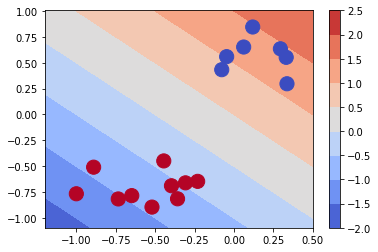

In [50]:
x1, x2 = np.mgrid[min(X[r1:r2,0]) - 0.2:max(X[r1:r2,0]) + 0.2:0.1,
min(X[r1:r2,1]) - 0.2:max(X[r1:r2,1]) + 0.2:0.1]

y = classificate(w0, w1, w2, np.concatenate((np.expand_dims(x1.ravel(), axis = 1), x2.reshape((-1,1))), axis = 1))
y = y.reshape(x1.shape)

plt.contourf(x1, x2, y, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.scatter(X[r1:r2,0], X[r1:r2,1], s = 200, c = Y[r1:r2], cmap=cmap)

delta_w0, delta_w1, delta_w2 = grad_loss(M())
w0 -= sigma * delta_w0
w1 -= sigma * delta_w1
w2 -= sigma * delta_w2

print(loss(M()))